In [1]:
%pylab inline
from scipy import integrate

Populating the interactive namespace from numpy and matplotlib


In [80]:
from matplotlib.legend_handler import HandlerLine2D
from scipy import integrate
from mpl_toolkits.axes_grid1 import AxesGrid
import yt
from yt.mods import *

In [81]:
cd /project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin

/global/project/projectdirs/astro250/doris/ramses3/trunk/ramses/bin


It looks like what I did in 09_18 I did eventually integrate out to 6.451 so not sure why that didn't work ... 

In [90]:
rho_c = 0.02806
scale_d = 3.92e-18

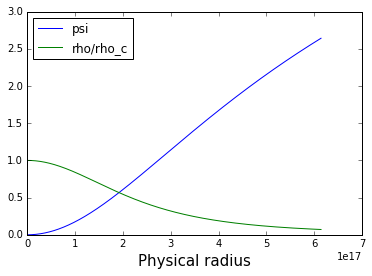

In [100]:
xi_max = 6.451
from scipy import integrate
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
plt.plot(r,asol[:,0],label ='psi')#$\psi$' )
plt.plot(r,rho,label ='rho/rho_c')#$\rho$')
plt.xlabel("Physical radius",fontsize=15)
from matplotlib.legend_handler import HandlerLine2D
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

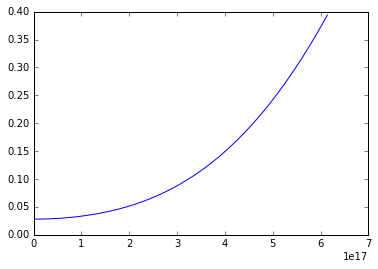

In [101]:
plt.plot(r,rho_c/rho,label ='rho')#$\rho$')

So the difference between our previrho_c

In [102]:
shape(rho_c/rho)

(646,)

In [103]:
(rho_c/rho)[-1]

0.39390784333650292

this is really weird, so apparently if you start the numerical integration from 1 to ximax you get a rho_c/rho of 14.6 but if you start integrating from 1e-6 (basically zero) to ximax you get 14.1

I'm not even using the inner values to define what rho_c is '

So maybe I need to redo the calculation using this more accurate xi range 

In [104]:
# idx = np.where(rho_c/rho>14.1)[0][0]
# print  xi[idx]

So this actually requires 6.47

No numerically this didn't go over '

In [106]:
np.savetxt("../patch/hydro/isothermal_sphere/density.txt",rho)

So now we switch back to the old density to see what exactly is wrong 

Okay so if I use this density everything seems to be okay. So there must have been somehting wrong with the new way that i was iinitalizing this thign 

In [10]:
yt.funcs.mylog.setLevel(50)

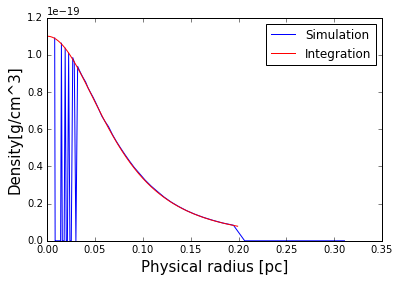

In [9]:
timestep =1
pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
sp = pf.sphere(pf.domain_center, (0.32,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")
xi_max = 6.451
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.plot(r*3.24077929e-19,rho*rho_c*scale_d,label ='Integration',color="red")#$\rho$')
plt.xlabel("Physical radius [pc]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)

(0, 15)

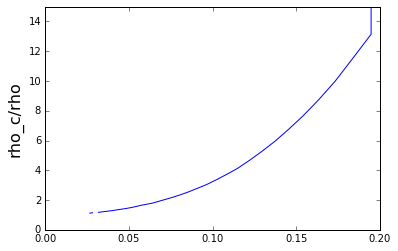

In [15]:
plt.plot(rp.x.value*3.24077929e-19,rho_c/rp["density"].in_units("g/cm**3").value*scale_d)
plt.ylabel("rho_c/rho",fontsize=16)
plt.xlim(0,0.2)
plt.ylim(0,15)

### Second try using $\xi_{max}$ = 6.48

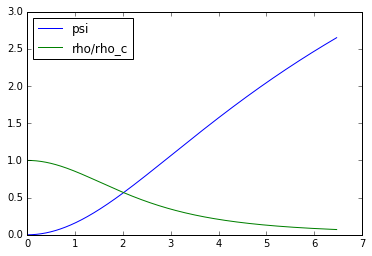

In [143]:
xi_max = 6.48
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho =  np.exp(-asol[:,0]) 
r = xi/1.05e-17 #[cm]
plt.plot(xi,asol[:,0],label ='psi')#$\psi$' )
plt.plot(xi,rho,label ='rho/rho_c')#$\rho$')
# plt.xlabel("Physical radius",fontsize=15)
from matplotlib.legend_handler import HandlerLine2D
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

In [144]:
(rho_c/rho)[-1]

0.39688893637574646

In [145]:
np.savetxt("../patch/hydro/isothermal_sphere/density.txt",rho)

In [139]:
shape(rho)

(648,)

why? 

Okay what if we try an intermediary value because we do know that 6.451 worked 

Oh 6.451 don't work anymore '

In [76]:
shape(rho)

(646,)

It might have something to do with allocating too large of an array 

It might have osmehting to do with the fact that I multiplied the rho_c to get the rho

But even if I take that out I still get the memory issue? 

actually maybe once you run out of memory you have to request the job again 

Oh yeah I forgot to make after changing condinit, mayeb that's why the array allocation runs out ofmemeory '

no that's not  the problem '

oops I'm running this on ramses on sink test not ramses3'

that's explains it ....'

ok fixed now, check that this profile is correct agai n

In [ ]:
def plot_time_slice(physical_quantity,timestep,text="",title="",zoom_factor="",grid=False,save=False):
    ds= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
    slc = yt.SlicePlot(ds, "z",physical_quantity)
    slc.set_axes_unit('pc')
    if zoom_factor!="":
        slc.zoom(zoom_factor)
    slc.set_cmap(physical_quantity,"rainbow")
    slc.set_font_size(20)
    if title!="":
    	slc.annotate_title(title)
    if text!="":
	slc.annotate_text((0.1, 0.1),text, coord_system='axis')	
    slc.annotate_text((0.05, 0.05),"timestep: {}".format(timestep), coord_system='axis')
    slc.annotate_text((0.05, 0.02),"time: {} Myrs".format(timestep*61793.091/1000000.), coord_system='axis')
    slc.annotate_velocity()
    if(grid): 
	slc.annotate_grids()
    if (save):
       name  =str(timestep)#physical_quantity[:3]+str(timestep)
       slc.save(name)
    else:
       slc.show()


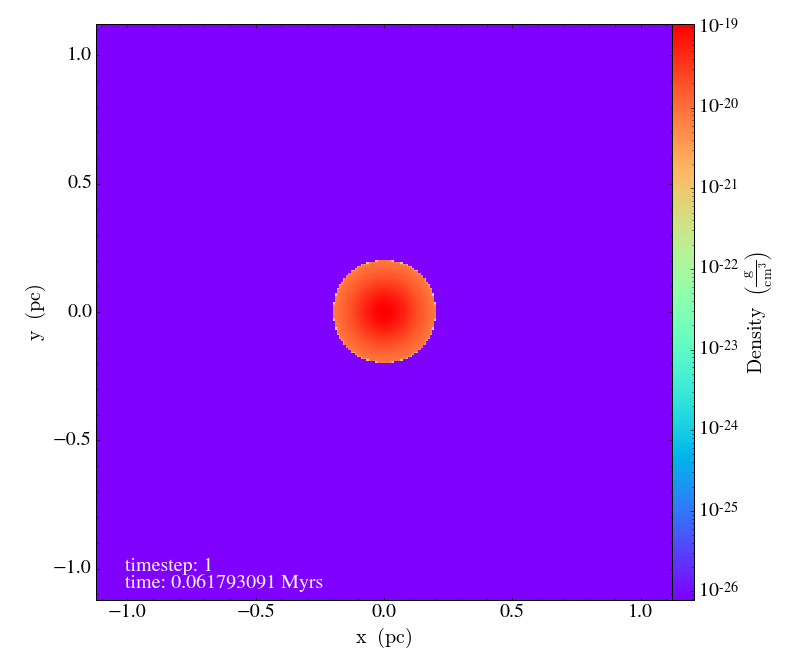

In [133]:
plot_time_slice("density",1)


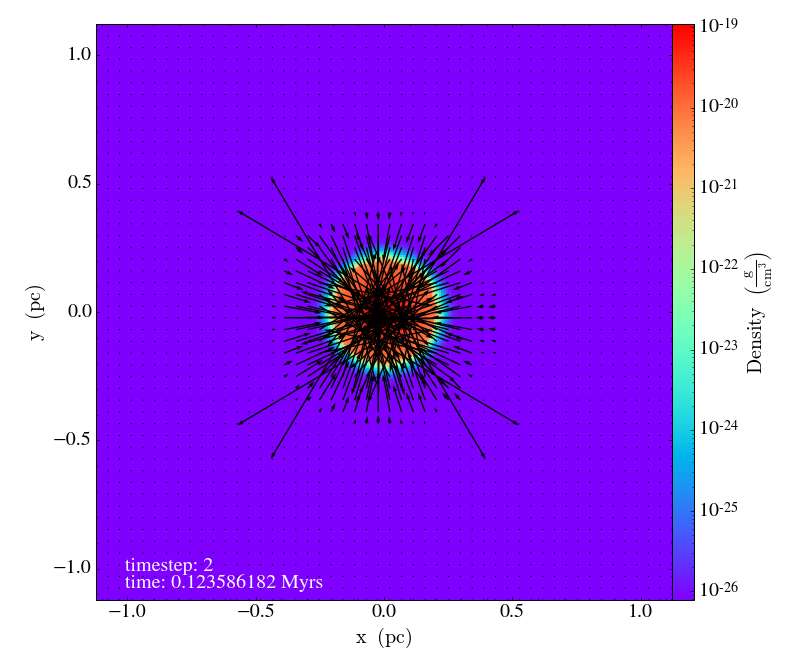

In [132]:
plot_time_slice("density",2)

woah there are 4 cells that is spewing out

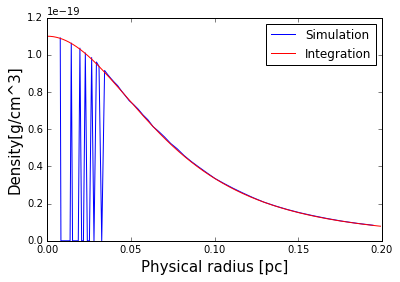

In [135]:
timestep =1
pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
sp = pf.sphere(pf.domain_center, (0.20,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")
xi_max = 6.451
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.plot(r*3.24077929e-19,rho*rho_c*scale_d,label ='Integration',color="red")#$\rho$')
plt.xlabel("Physical radius [pc]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)

ok moving on to the new profile`

Not sure why the 6.48 case cause density to drop by so much 

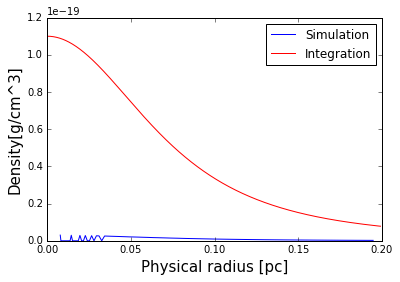

In [146]:
timestep =1
pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
sp = pf.sphere(pf.domain_center, (0.20,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")
xi_max = 6.451
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.plot(r*3.24077929e-19,rho*rho_c*scale_d,label ='Integration',color="red")#$\rho$')
plt.xlabel("Physical radius [pc]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)

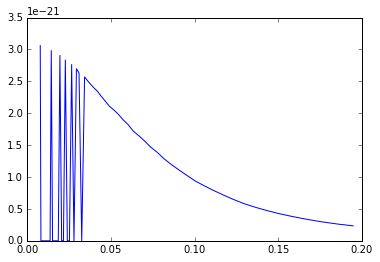

In [147]:
timestep =1
pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
sp = pf.sphere(pf.domain_center, (0.20,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")

This is lowered by 3 orders of magnitude because I multiplied rho by rho_c, we ddont do this is bad, you do this inside the fortran code already that's twice rho_c '

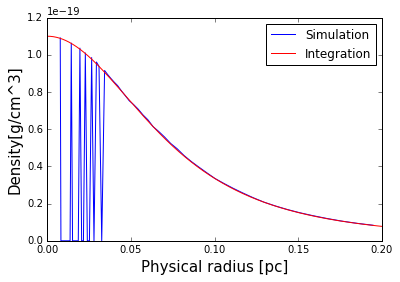

In [152]:
timestep =1
pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
sp = pf.sphere(pf.domain_center, (0.20,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")
xi_max = 6.48
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.plot(r*3.24077929e-19,rho*rho_c*scale_d,label ='Integration',color="red")#$\rho$')
plt.xlabel("Physical radius [pc]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)

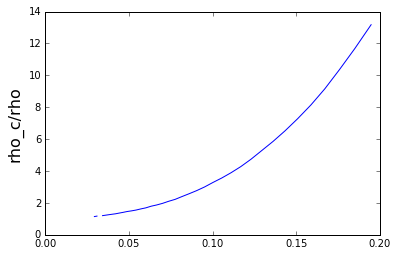

In [150]:
plt.plot(rp.x.value*3.24077929e-19,rho_c/rp["density"].in_units("g/cm**3").value*scale_d)
plt.ylabel("rho_c/rho",fontsize=16)
# plt.xlim(0,0.2)
# plt.ylim(0,15)


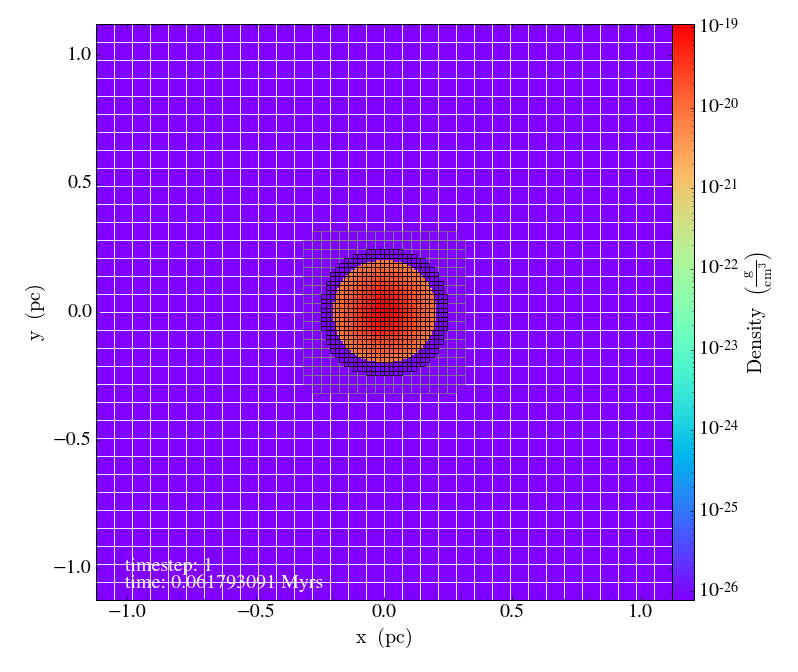

In [154]:
plot_time_slice("density",1,grid=True)

Turn off AMR just so I know what's going on, that the IC is getting initialized correctly 

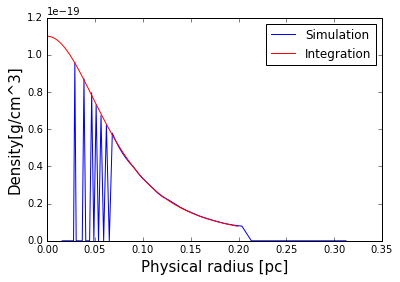

In [158]:
compareplot1Dprofile(1)

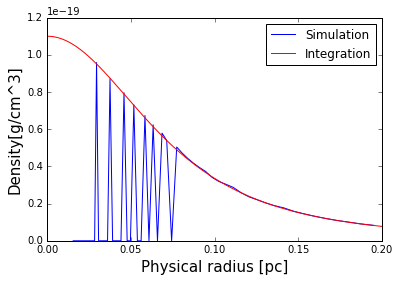

In [163]:
timestep =1
pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
plt.figure()
sp = pf.sphere(pf.domain_center, (0.20,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")
xi_max = 6.48
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.plot(r*3.24077929e-19,rho*rho_c*scale_d,label ='Integration',color="red")#$\rho$')
plt.xlabel("Physical radius [pc]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)

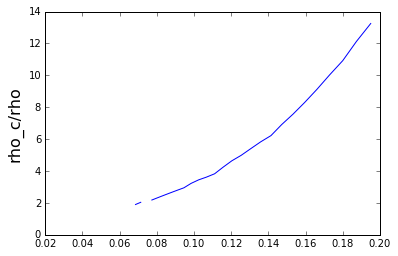

In [162]:
plt.plot(rp.x.value*3.24077929e-19,rho_c/rp["density"].in_units("g/cm**3").value*scale_d)
plt.ylabel("rho_c/rho",fontsize=16)

Not sure why it doesn't seem to register the last cells at the boundary'

Okay set soemthing integrate out to very long and high density contrast to see if it collapse 

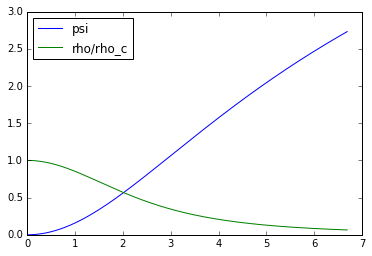

In [175]:
xi_max = 6.7
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho =  np.exp(-asol[:,0]) 
r = xi/1.05e-17 #[cm]
plt.plot(xi,asol[:,0],label ='psi')#$\psi$' )
plt.plot(xi,rho,label ='rho/rho_c')#$\rho$')
# plt.xlabel("Physical radius",fontsize=15)
from matplotlib.legend_handler import HandlerLine2D
plt.legend(loc='upper left',prop={'size':12},numpoints=1)
np.savetxt("../patch/hydro/isothermal_sphere/density.txt",rho)

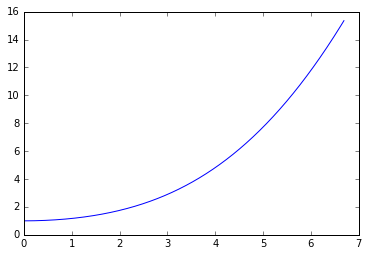

In [176]:
plt.plot(xi,1/rho,label ='rho_c/rho')#$\rho$')

In [172]:
(1/rho)[-1]

15.348988310385982

Yeah this should definitely collapse 

In [174]:
shape(rho)

(670,)

changing size of dens_arr and rmax inside fortran condinit

kill jobs by Ctrl+c not by ctrl+z ("Z" for zombie) , this just hides it, that's why in your debuggin session there's a bunch of jobs that stacks up and then after a while I can't run anymore jobs, because there are too many sruns ongoinging

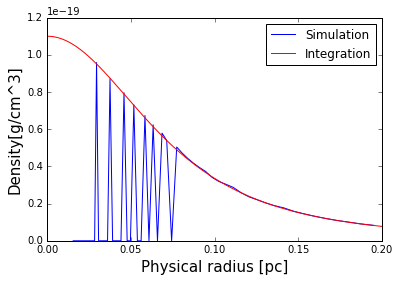

In [178]:
timestep =1
pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
plt.figure()
sp = pf.sphere(pf.domain_center, (0.20,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")
xi_max = 6.48
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.plot(r*3.24077929e-19,rho*rho_c*scale_d,label ='Integration',color="red")#$\rho$')
plt.xlabel("Physical radius [pc]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)

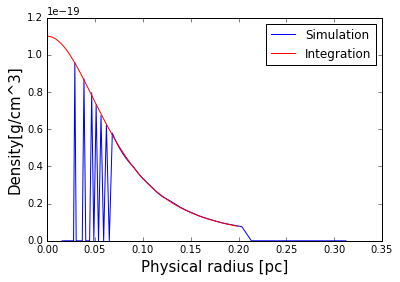

In [180]:
compareplot1Dprofile(1)

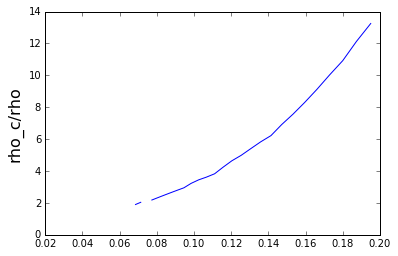

In [179]:
plt.plot(rp.x.value*3.24077929e-19,rho_c/rp["density"].in_units("g/cm**3").value*scale_d)
plt.ylabel("rho_c/rho",fontsize=16)

Not sure why the thing is not extending beyond this radius even though I changed rmax. 

I will set this running for 1 free fall time and see if ti collapses 


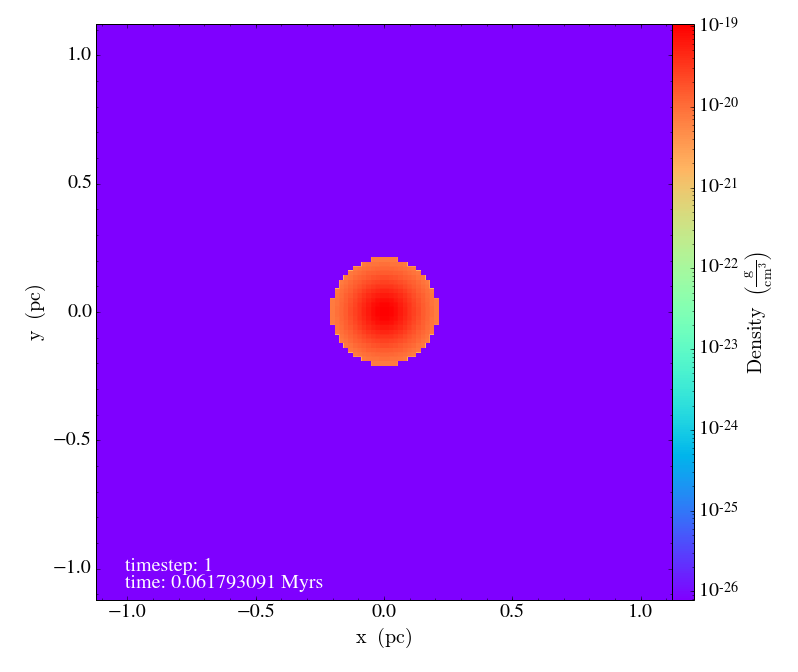


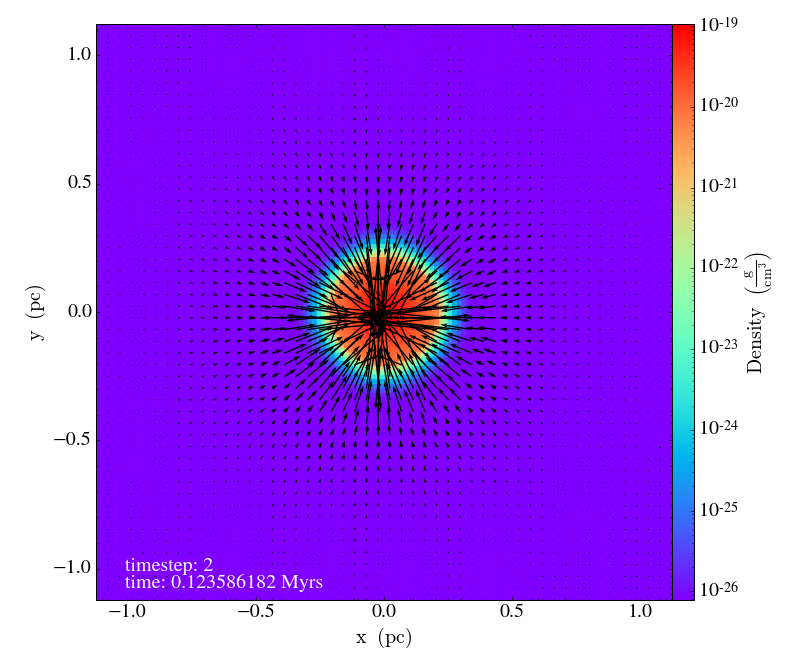


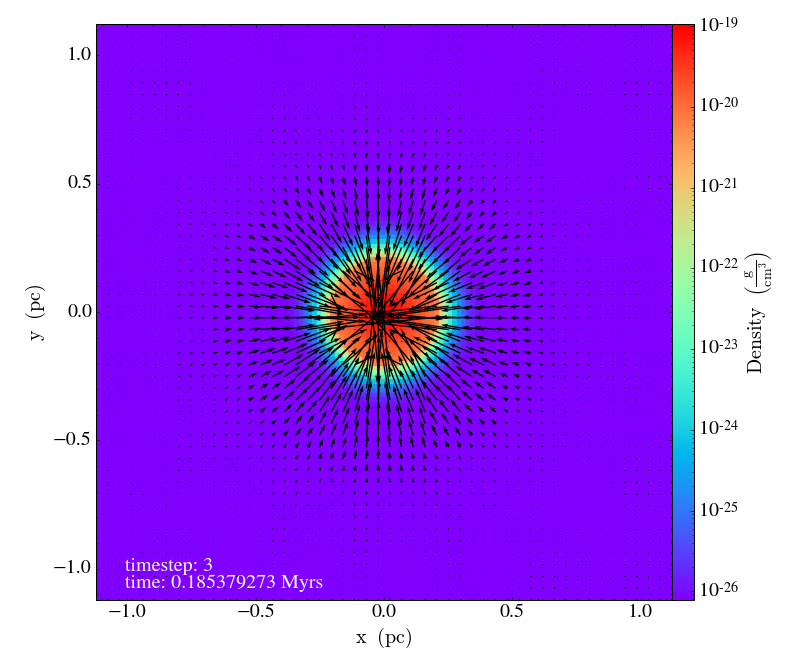


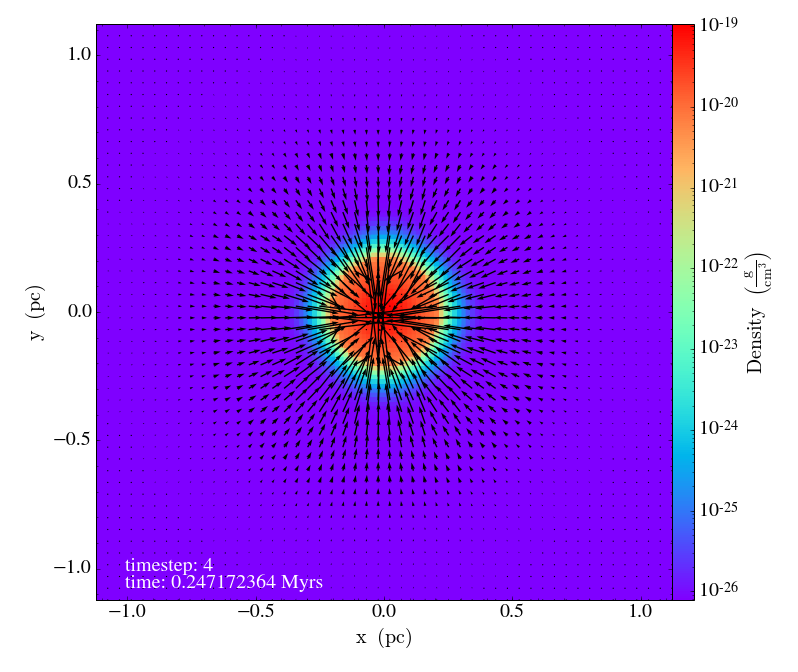


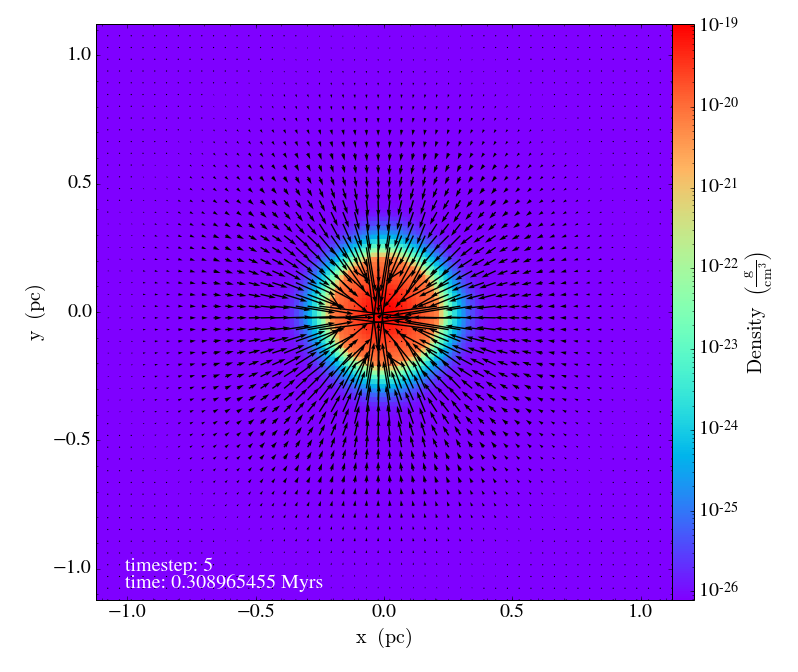


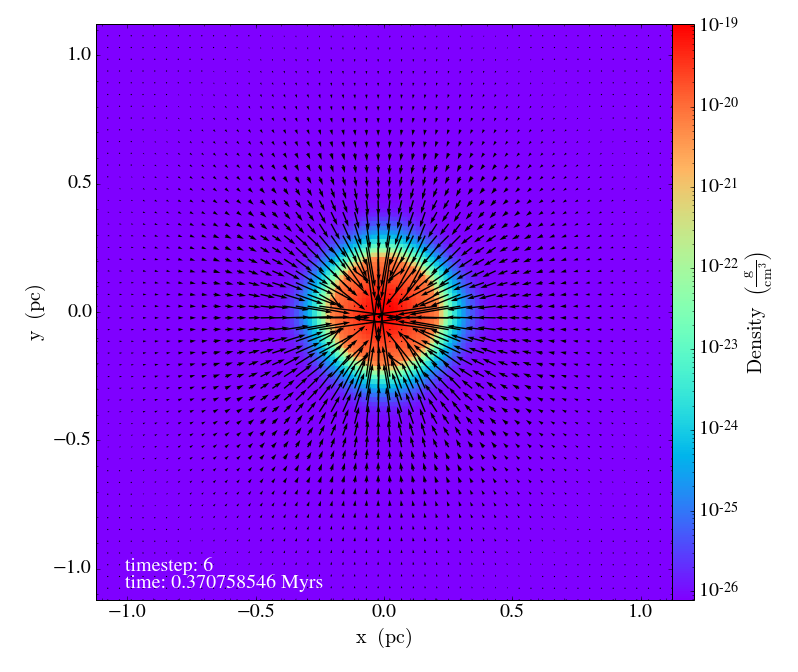


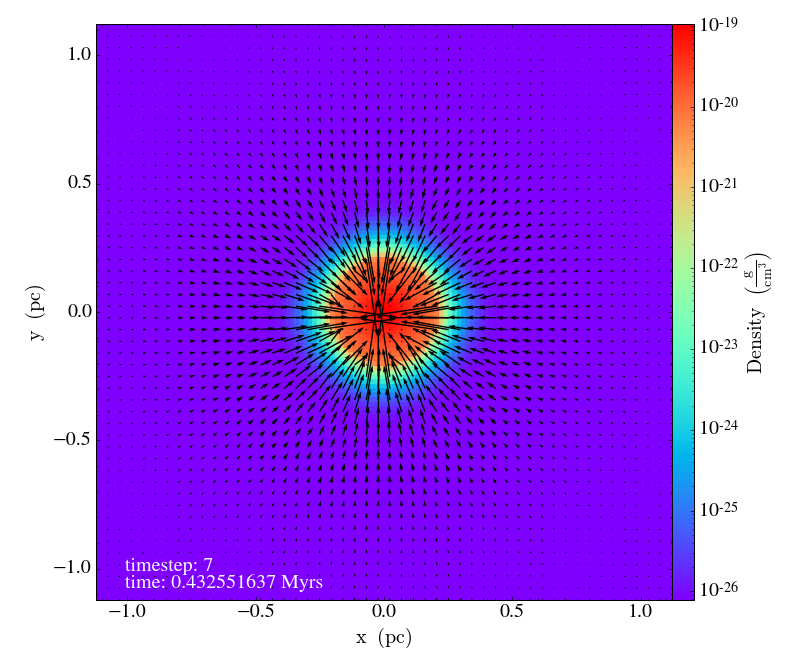


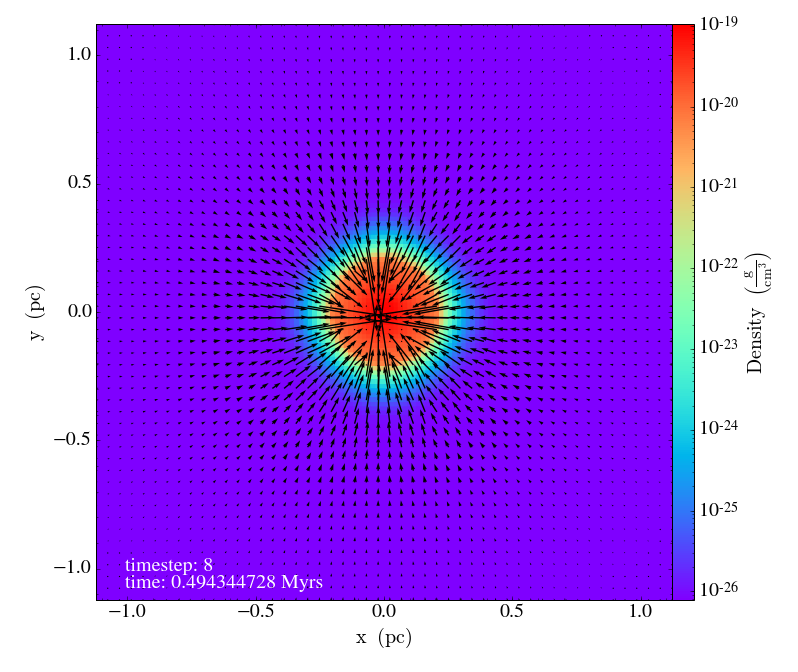


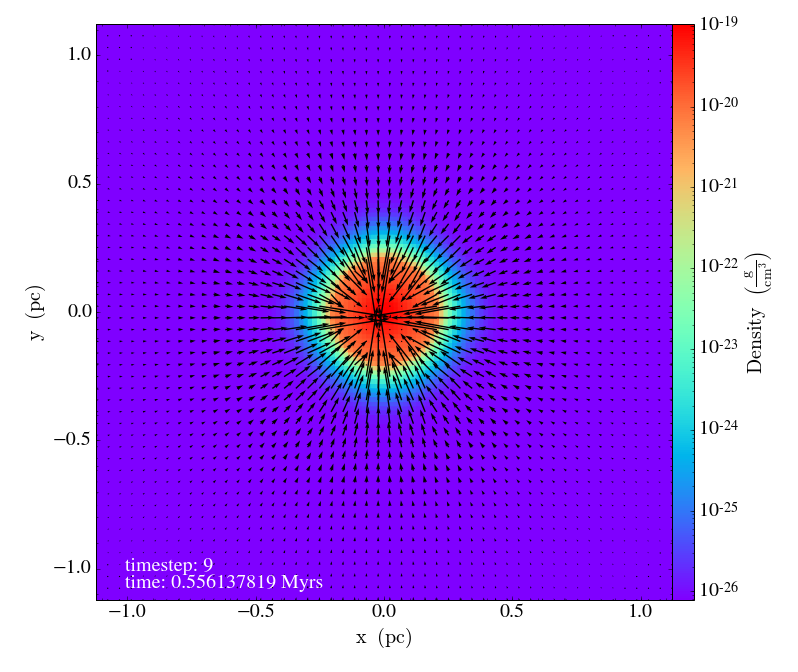

In [182]:
for i in np.arange(1,10):
    plot_time_slice("density",i)


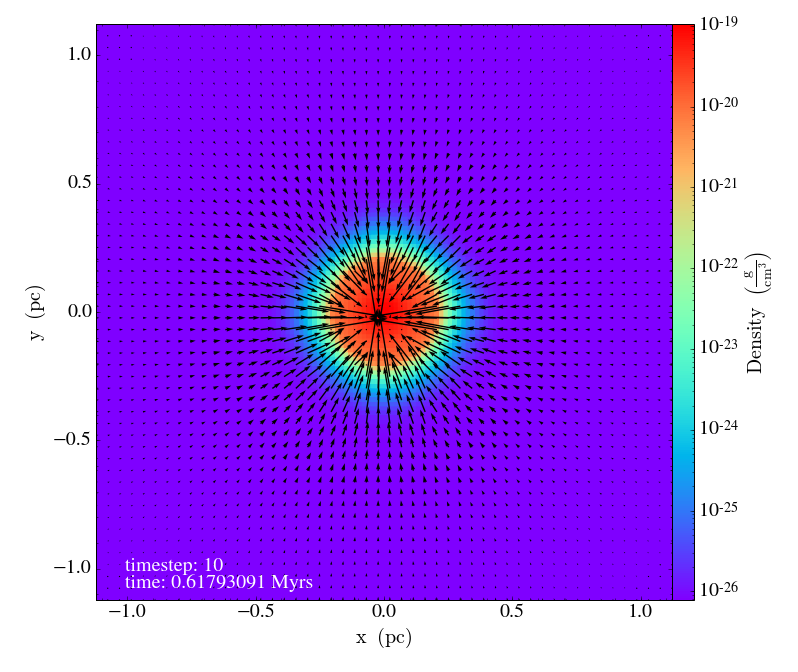


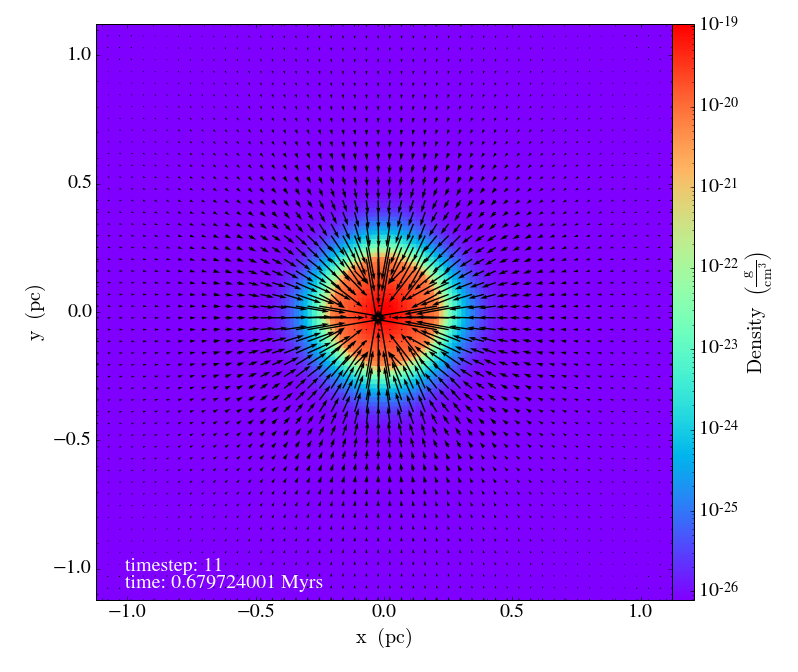


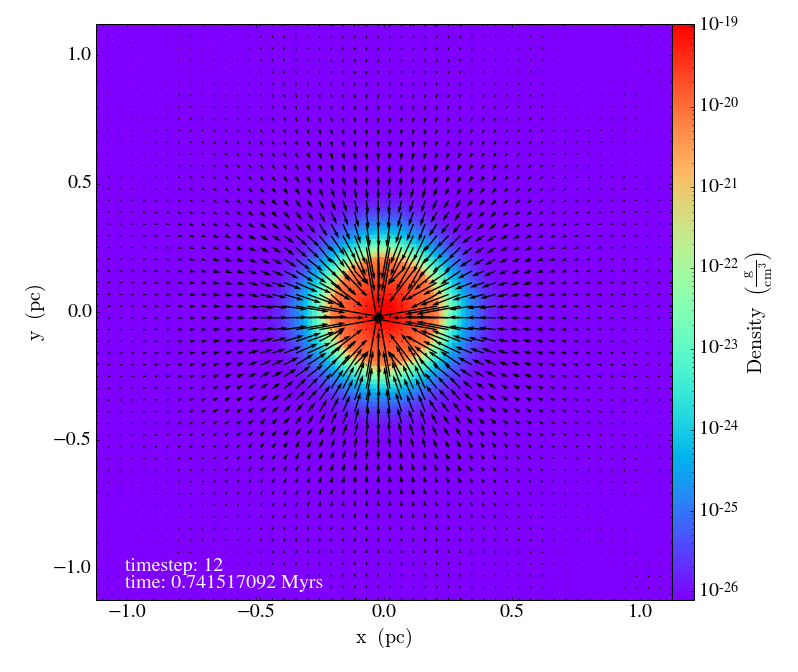


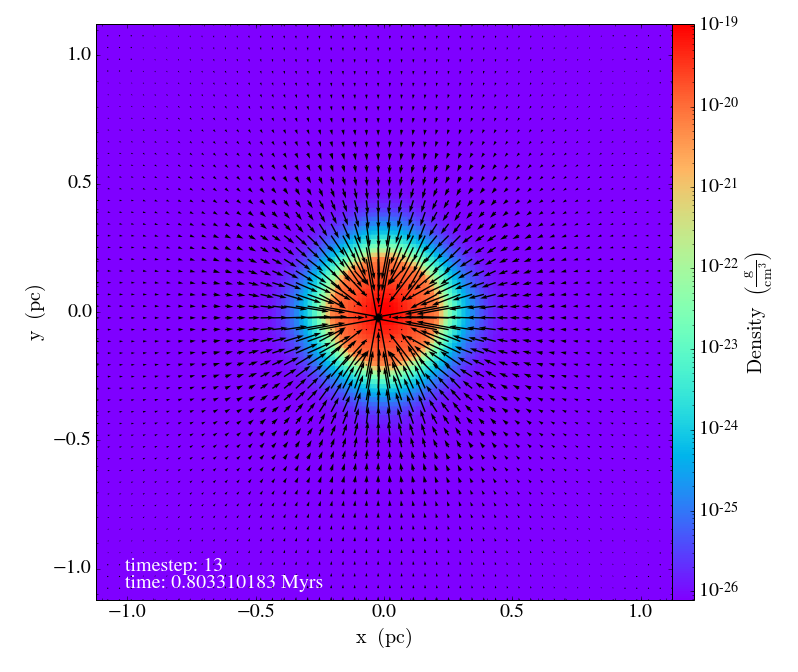


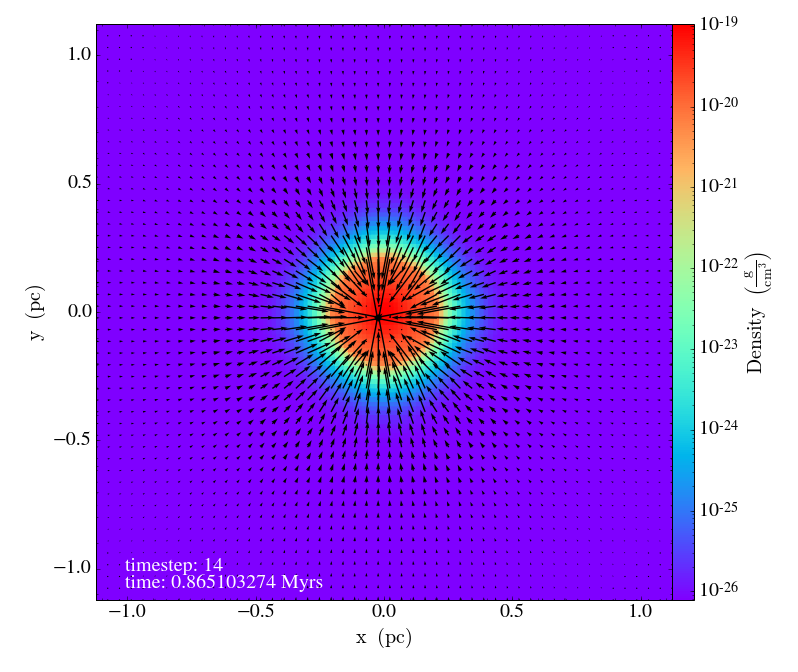


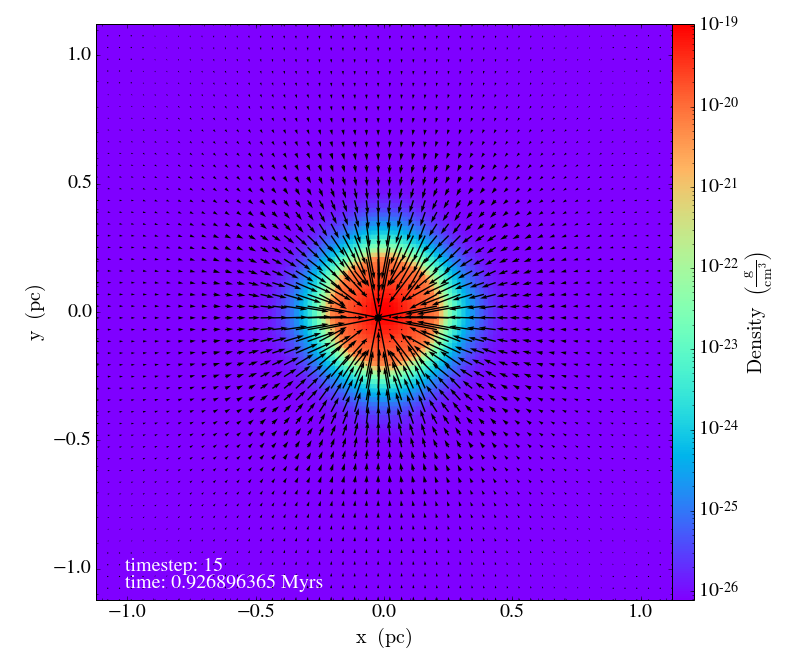


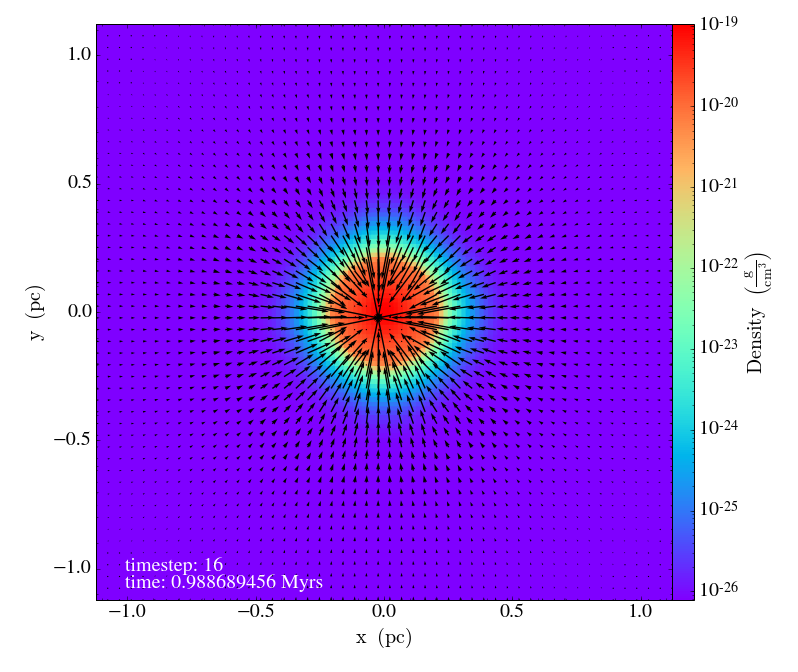


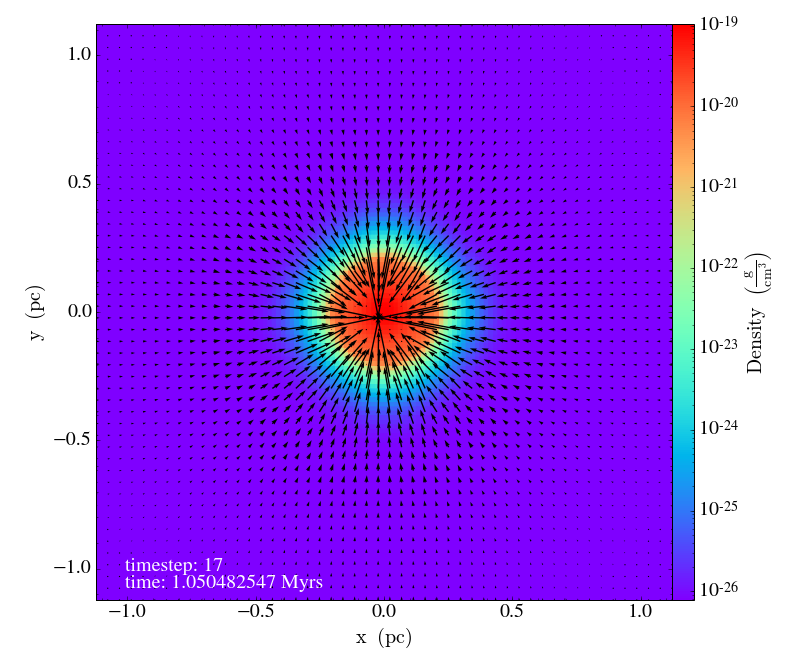


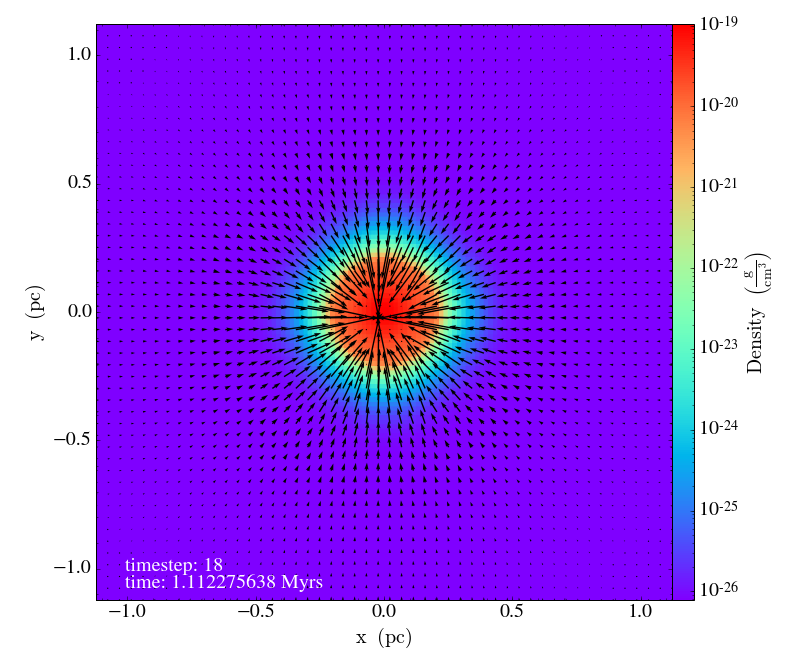


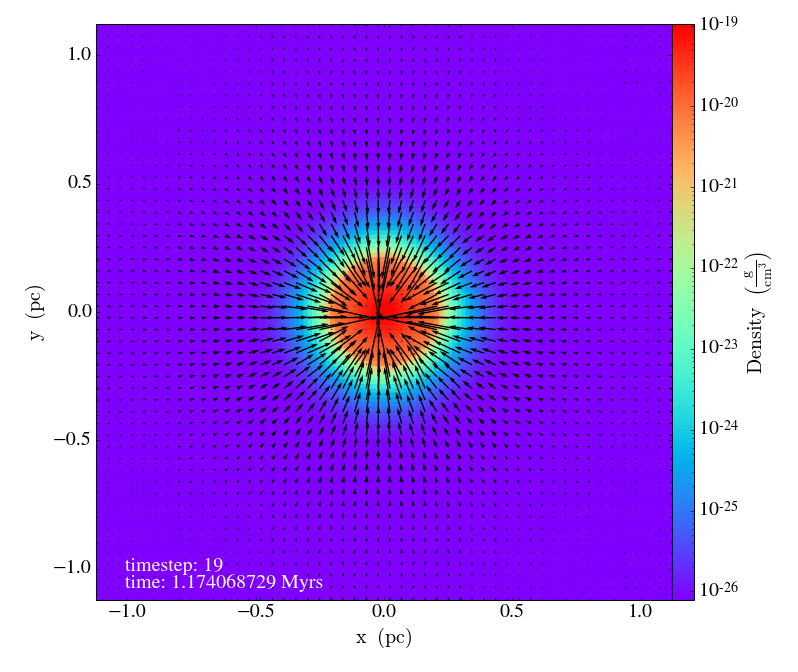


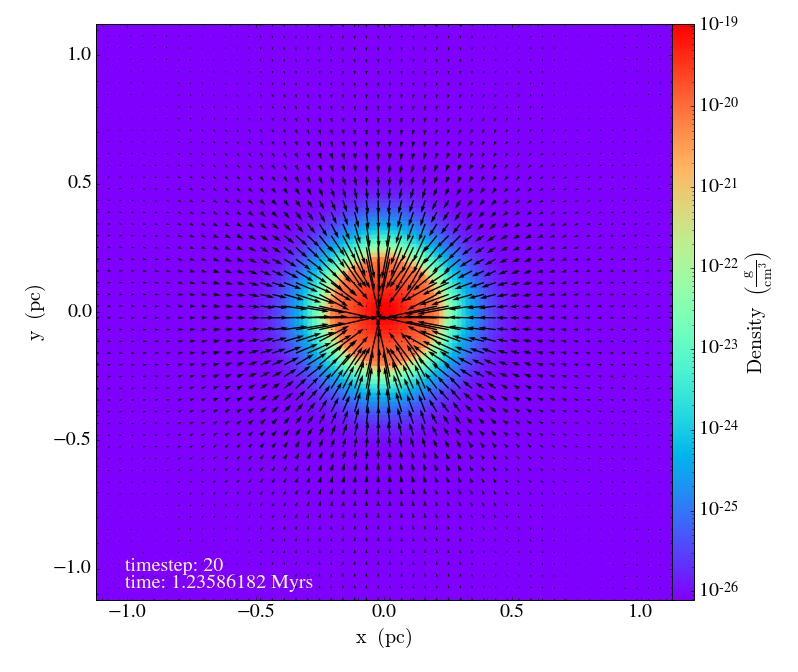


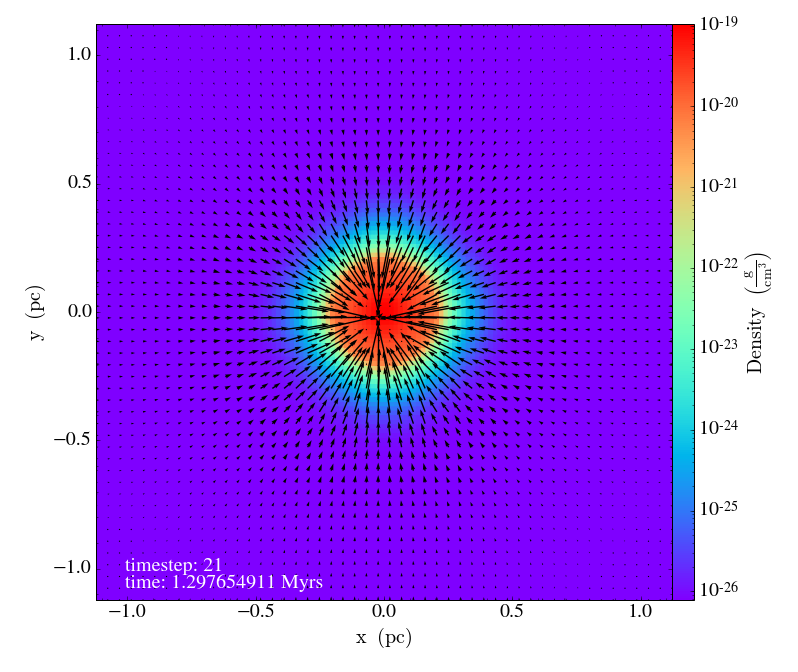


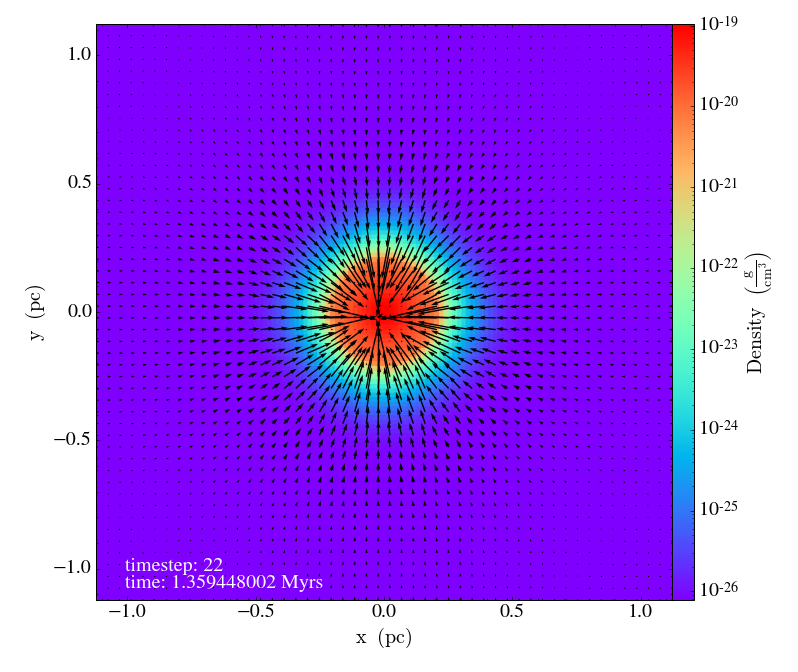


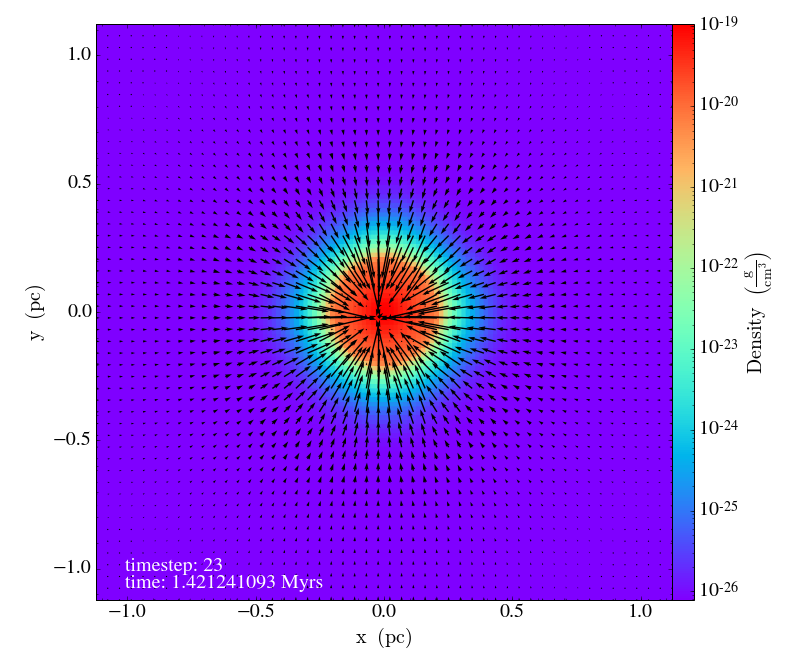


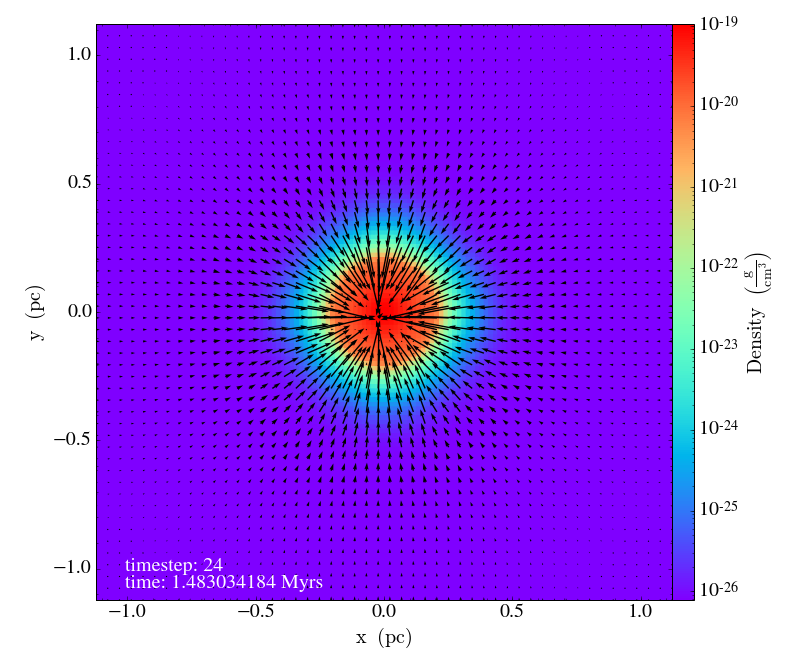

In [183]:
for i in np.arange(10,25):
    plot_time_slice("density",i)

Size of sphere didn't even contract '